In [12]:
''' многостраничный отчет
Используя данные по активностям в парках Москвы
https://video.ittensive.com/python-advanced/data-107235-2019-12-02.utf.json
Создайте PDF отчет, в котором выведите:
1. Диаграмму распределения числа активностей по паркам, топ10 самых активных
2. Таблицу активностей по всем паркам в виде Активность-Расписание-Парк'''

from reportlab.pdfgen import canvas
from reportlab.lib import pagesizes
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.lib.utils import ImageReader
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#https://video.ittensive.com/python-advanced/data-107235-2019-12-02.utf.json
data_rqst = requests.get("http://video.ittensive.com/python-advanced/data-107235-2019-12-02.utf.json")
data_m = pd.DataFrame(json.loads(data_rqst.content),columns = ["CourseName","CoursesTimetable", "NameOfPark"]).fillna(value=0)
data_m["NameOfPark"] = data_m["NameOfPark"].apply(lambda x: x["value"])
print ("Тайцзицюань: ",
       data_m[data_m["CourseName"].str.contains("Тайцзицюань")]["CourseName"].count())
print (data_m.head())

Тайцзицюань:  1
                               CourseName  \
0               Английский язык для детей   
1            Киноклуб на английском языке   
2               Цигун на открытом воздухе   
3  Мастер-классы по парным танцам на льду   
4       Мастерские театрального художника   

                        CoursesTimetable  \
0  Воскресенье, 16:00–17:00, 17:00–18:00   
1                   Пятница, 20:30–22:00   
2               Воскресенье, 14:00–16:00   
3                   Суббота, 17:00–18:00   
4        Вторник, 15:00–16:00, с декабря   

                                 NameOfPark  
0  Сад культуры и отдыха имени Н.Э. Баумана  
1  Сад культуры и отдыха имени Н.Э. Баумана  
2  Сад культуры и отдыха имени Н.Э. Баумана  
3  Сад культуры и отдыха имени Н.Э. Баумана  
4  Сад культуры и отдыха имени Н.Э. Баумана  


In [1]:
from PyPDF2 import PdfMerger, PdfReader
from PIL import Image

In [13]:
data_group = data_m.groupby("NameOfPark").count().sort_values("CoursesTimetable", ascending=False)
data_group = data_group[0:10]
print (data_group)


                                             CourseName  CoursesTimetable
NameOfPark                                                               
Парк Сокольники                                      41                41
Парк Таганский (Основная территория)                 18                18
Парк «Ходынское поле» (основная территория)          15                15
Воронцовский парк                                    13                13
Парк «Фили»                                          13                13
Парк Победы на Поклонной горе                        13                13
Парк «Северное Тушино»                               10                10
Измайловский парк                                     8                 8
Сквер по Олонецкому проезду                           6                 6
Сад культуры и отдыха имени Н.Э. Баумана              6                 6


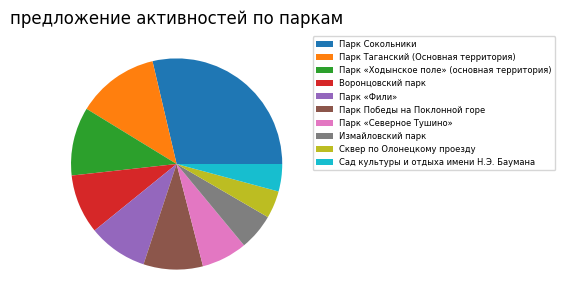

In [20]:
fig = plt.figure(figsize=(5,3))
area = fig.add_subplot(1, 1, 1)
area.set_title("предложение активностей по паркам", fontsize=12)
data_group["CourseName"].plot.pie(ax = area,  labels=[""]*10, label="", cmap="tab10")
plt.legend(data_group.index, bbox_to_anchor=(1,1,0.1,0), fontsize=6)
plt.subplots_adjust(bottom=0, left=-0.0) #сдвигаем графиг к левому краю
plt.savefig('park.png') # сохраняем график ввиде рисунка

In [16]:
import binascii
with open('park.png', 'rb') as file:
    img = 'data:image/png;base64,' + binascii.b2a_base64(file.read(), newline=False).decode("UTF-8")
data_m.columns = ["Активность", "Расписание","Парк",]
data_m.set_index("Активность", inplace=True)

In [19]:
from jinja2 import Template
import pdfkit
html_template = '''<html>
<head>
    <title>таблица активностей с расписанием</title>
    <meta charset="utf-8"/>
</head>
<body>
    <h1>Распределение посетителей</h1>
    <img src="{{data_m.image}}" alt="Распределение посетителей">
    <h2>Данные по библиотекам</h2>
    {{data_m.table}}
</body>
</html>'''

html = Template(html_template).render(data_m = {
    'image': img,
    'table': data_m.to_html()# метод pandas
})
config = pdfkit.configuration(wkhtmltopdf='D:/wkhtmltopdf/bin/wkhtmltopdf.exe')
options = {
    'page-size': 'A4',
    'header-right': '[page]'
}
pdfkit.from_string(html, 'parks_m.pdf',
                   configuration=config, options=options)
#with open("parks_m.html", "w", encoding="utf-8") as file:
#    file.write(html)


True